<a href="https://colab.research.google.com/github/JNX03/GcWork/blob/main/MNIST_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8157 - loss: 0.5916 - val_accuracy: 0.9807 - val_loss: 0.0689
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9698 - loss: 0.1006 - val_accuracy: 0.9865 - val_loss: 0.0496
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9778 - loss: 0.0712 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.9809 - loss: 0.0628 - val_accuracy: 0.9902 - val_loss: 0.0371
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9836 - loss: 0.0517 - val_accuracy: 0.9908 - val_loss: 0.0334
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.9858 - loss: 0.0459 - val_accuracy: 0.9903 - val_loss: 0.0334
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.9870 - loss: 0.0405 - val_accuracy: 0.9918 - val_loss: 0.0313
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9877 - loss: 0.0384 - 

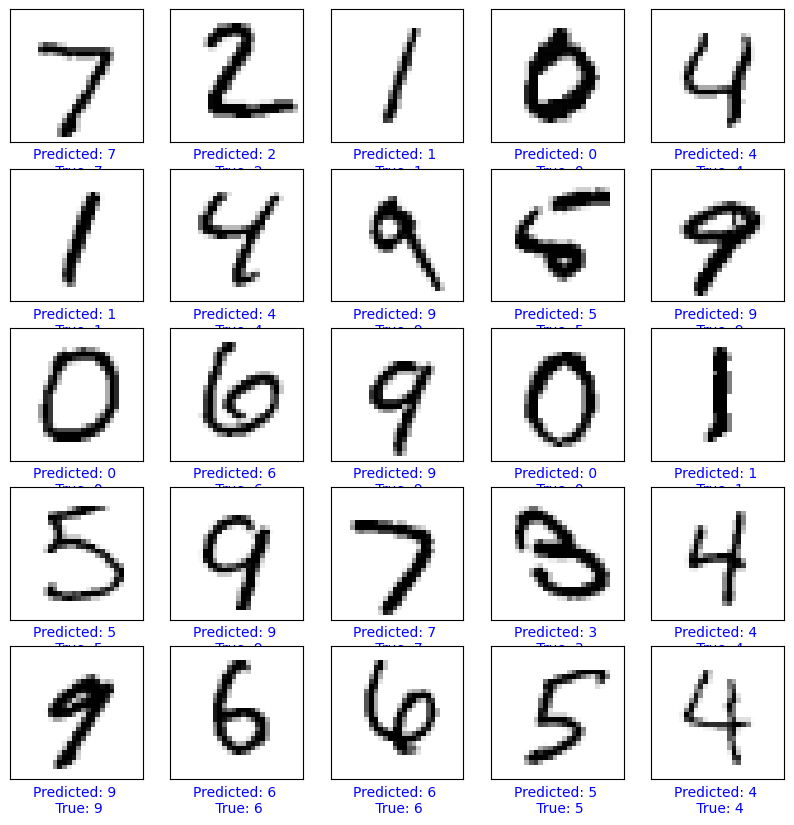

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", accuracy)

predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("Predicted: {} \n True: {}".format(predicted_label, true_label), color=color)
plt.show()

model.save("mnist_model.h5")

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
model = keras.models.load_model("mnist_model.h5")
number = input("Enter a number between 0 and 9: ")

predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[int(number)])
print("Predicted label:", predicted_label)

plt.imshow(x_test[int(number)].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Enter a number between 0 and 9: 8


ValueError: Unrecognized data type: x=8 (of type <class 'str'>)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

data = digits.data
target = digits.target

print(data.shape)
print(target.shape)

print(digits.DESCR)
print(digits.data[0])
print(digits.target[0])


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
import matplotlib.pyplot as plt
import numpy

#plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.show()

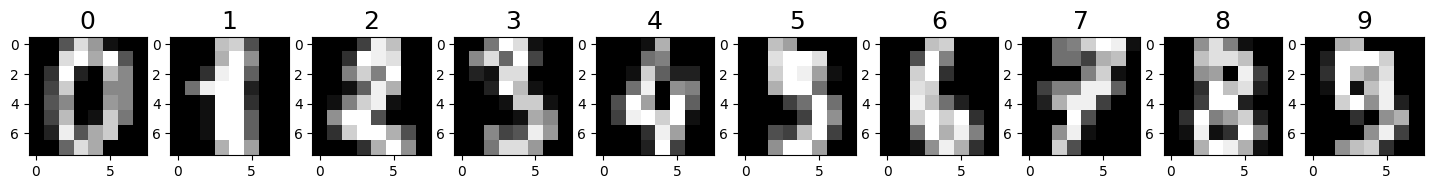

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18,8))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap='gray')
    plt.title(label, fontsize = 18)
plt.show()